# Example Curie-Weiss and heat capacity fits

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
from pylab import matplotlib
matplotlib.rc('font', **{'family':"sans-serif", 'size': 15})

### Lets create some synthetic data for each fitting type.

In [14]:
#Curie-Weiss susceptibility

#Curie-Weiss function
def CWchi(T,params):
    C = params[0] #Curie constant
    Th = params[1] #Theta 
    chi = params[2] #Temperature independent chi term
    return (C) / (T-Th) + chi

#Synthetic data with noise susceptibility
param_test_CW = [1,-10,0.0001]
x_CW = np.linspace(1,350,349)
noise_CW = np.random.randint(55,100,size=x_CW.shape[0])/100.
y_CW = CWchi(x_CW, param_test_CW)*noise_CW

In [15]:
#Specific heat

#Debye function with up to two Debye temperature
def debye_function(T, debye_temperature1, prefactor1, debye_temperature2 = None, prefactor2 = None):
    
    #Gas constant
    R = 8.3144598 #J  K−1 mol−1
    
    def debye_integrand(x):
        #Main integral used for computing specific heat given a debye temperature
        return np.power(x,4)*np.power(np.e,x)/np.power((np.power(np.e,x)-1),2)
    
    #Calcualte heat capacity for 1st debye temperature
    heat_capacity1 = [prefactor1*9.*R*(T[i]/debye_temperature1)**3.*quad(debye_integrand, 0, debye_temperature1/T[i])[0] 
                for i in range(0,len(T))]
    
    #Calcualte heat capacity for optional 2nd debye temperature
    if debye_temperature2 != None:
        heat_capacity2 = [prefactor2*9.*R*(T[i]/debye_temperature2)**3.*quad(debye_integrand, 0, debye_temperature2/T[i])[0] 
                          for i in range(0,len(T))]
        return np.array(heat_capacity1) + np.array(heat_capacity2)
    else:
        return np.array(heat_capacity1)


#Synthetic data with noise specific heat
cp_test = [100, 10, 150, 10]
x_cp = np.linspace(1,350,349)
noise_cp = np.random.randint(75,100,size=x_cp.shape[0])/100.
y_cp = debye_function(x_cp, 100, 10, 150, 10)*noise_cp

### How to fit each data type and plot

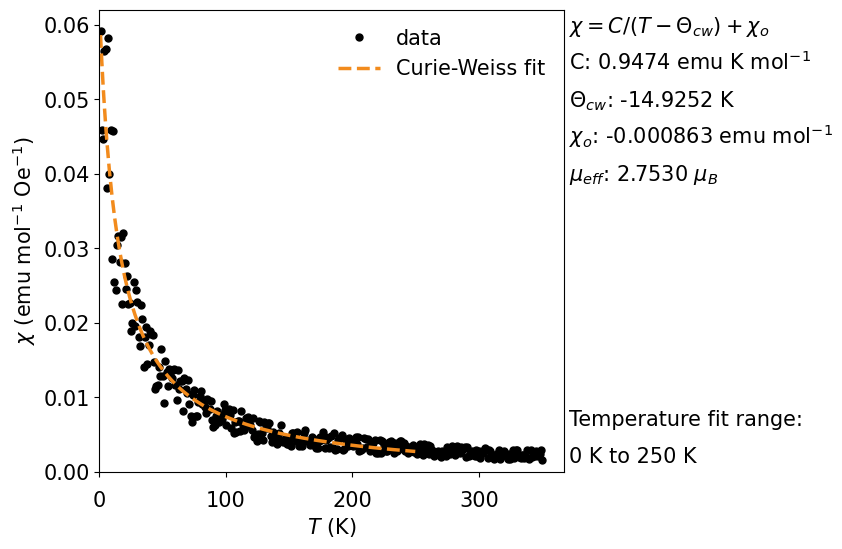

In [16]:
#Curie-Weiss suceptibility
from PhysicalProperties import CurieWeiss

#Set up an initialization 'guess' of:
    #C - Curie constant (emu K / mol)
    #Th - Theta (K)
    #chi - Temperature-independent chi0 term should be (emu / mol)
param_guesses_CW = [2, -15, 0.000005]

#Create, trim, fit, and plot the Curie-Weiss object
CW_object = CurieWeiss(x_CW, y_CW, param_guesses_CW)
CW_object.data_trim(0, 250) #Use this if you need to trim to a specific temperature range (in K)
CW_object.fit() # parameters & statistics are stored in class attributes .fitparams and .fitcov 
CW_object.plotter(inverted=False) #1/X is commonly plotted, but you can turn this off

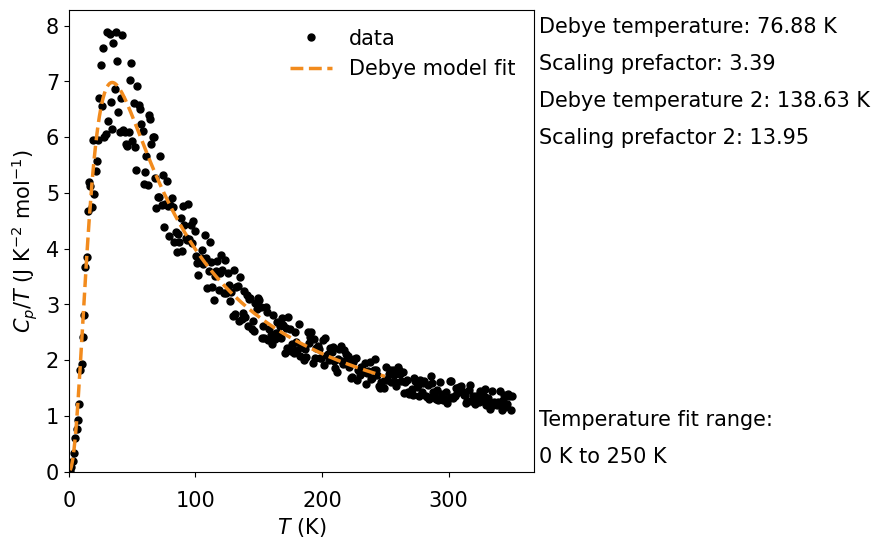

In [17]:
#Specific heat
from PhysicalProperties import HeatCapacityDebye

#Set up initialization 'guess' of:
    #Debye temperature 1
    #Debye scale 1
    #Debye temperature 2
    #Debye scale 2
param_guesses_cp = [110, 9, 190, 8]

#Create, trim, fit, and plot the HeatCapacityDebye object
cp_object = HeatCapacityDebye(x_cp, y_cp, param_guesses_cp)
cp_object.data_trim(0, 250)
cp_object.fit() # parameters & statistics are stored in class attributes .fitparams and .fitcov 
cp_object.plotter()